In [153]:
#Data Load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

pd.set_option('display.max.colwidth', 50)
pd.set_option('display.width', 1000)

raw_dataset = pd.read_csv('./data/5_PA_2.csv', header=0, index_col=False)
print("* Raw dataset size : ", len(raw_dataset))

dataset = raw_dataset[["weight", "failure", "set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]

positive_set = dataset.where(dataset["failure"]==0).dropna()
print("Positive Data : ", len(positive_set))
positive_X = positive_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Positive X : ", len(positive_X))

negative_set = dataset.where(dataset["failure"]==1).dropna()
print("Negative Data : ", len(negative_set))
negative_X = negative_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Negative X : ", len(negative_X))

positive_y = positive_set[["weight"]]
print("Positive y : ", len(positive_y))
negative_y = negative_set[["weight"]]
print("Negative y : ", len(negative_y))

data_columns = positive_X.columns.to_numpy()

* Raw dataset size :  66
Positive Data :  51
Positive X :  51
Negative Data :  15
Negative X :  15
Positive y :  51
Negative y :  15


In [167]:
X_train, X_test, y_train, y_test = train_test_split(positive_X, np.ravel(positive_y), test_size=0.33, shuffle=True)
model = RandomForestRegressor(max_depth=10, max_features=5, oob_score=False, bootstrap=False).fit(X_train, y_train)
#model = BaggingRegressor(base_estimator=None, max_features=5).fit(X_train, y_train)

y_pred_trainset = model.predict(X_train)
y_pred_testset = model.predict(X_test)

# print("Trainset R2 Score :", (r2_score(y_train, y_pred_trainset))) 
# print("Testset R2 Score :", (r2_score(y_test, y_pred_testset)))
# print("Number of Train Samples : ", len(X_train))

print("* K-fold Cross validation scores :")
scores = cross_val_score(model, positive_X, np.ravel(positive_y), cv=5, scoring="neg_mean_absolute_percentage_error")*-100
print(scores)
print("Average MAPE : %0.2f %%"%scores.mean())
#print("Average Score : %0.2f (standard deviation : %0.2f)"% scores.mean(), scores.std())
#print("* %0.2f accuracy with a standard deviation of %0.2f" % scores.mean(), scores.std())

# feature importances
# prediction = model.predict(X_train)
#print(mean_squared_error(y_train, y_pred_trainset))
# print("* Mean Absolute Percentage Error (@positive, trainset) : ", mean_absolute_percentage_error(y_train, y_pred_trainset)*100)
# print("* Mean Absolute Percentage Error (@positive, testset) : ", mean_absolute_percentage_error(y_test, y_pred_testset)*100)
# print("Train : ", y_test)
# print("Train Predict : ", y_pred_testset)
# featureImportance = model.feature_importances_

# feature importance (ordering)
# featureImportance = featureImportance/featureImportance.max()
# sorted_idx = np.argsort(featureImportance)
# barPos = np.arange(sorted_idx.shape[0])+.5
# plt.barh(barPos, featureImportance[sorted_idx], align='center')
# plt.yticks(barPos, data_columns[sorted_idx])
# plt.xlabel('Variable Importance')
# plt.show()



* K-fold Cross validation scores :
[2.80923863 2.9361719  1.87035403 0.35377939 0.3878512 ]
Average MAPE : 1.67 %


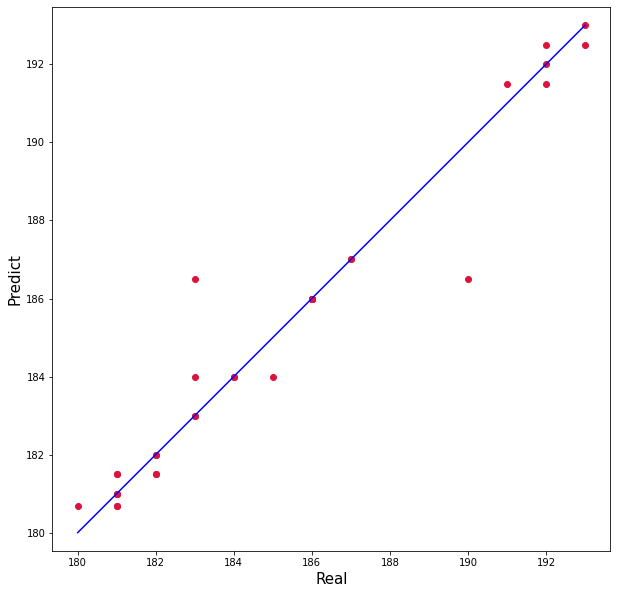

In [110]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_trainset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_trainset), max(y_train))
p2 = min(min(y_pred_trainset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()

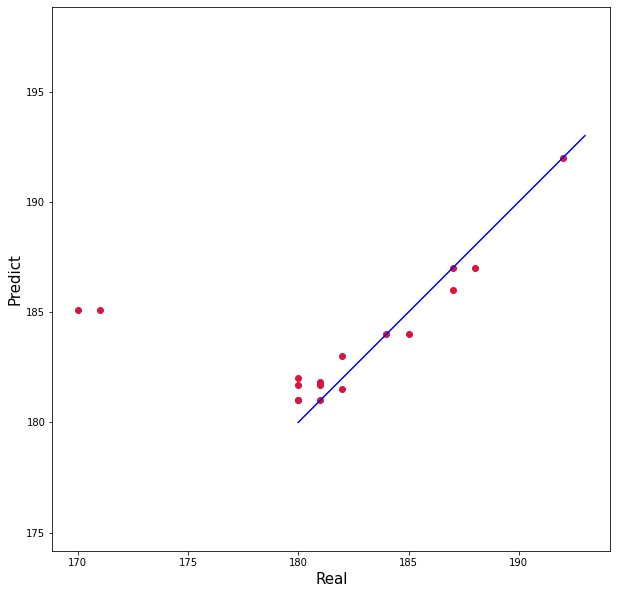

In [111]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_testset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_testset), max(y_train))
p2 = min(min(y_pred_testset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()

In [72]:
# prediction
inputset = ["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]

input = [250, 230, 230,	220, # temperature
        40, 50,	50,	45,	40,	# mold velocity
        50,	60,	50,	50,	50,	# mold pressure
        85,	50,	40,	35,	25, #mold position
        20,	0,	0,	#hold velocity
        40,	0,	0] #hold pressure
result = model.predict([input])
print("Predicted weight : ", result)

Predicted weight :  [189.3518995]


/Users/byunghunhwang/dev/moldlink/venv/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
